5.  Apply  Principal  Component  Analysis  (PCA)  and  Linear  Discriminant  Analysis (LDA) on MNIST dataset. Compare the performance of PCA vs. LDA for classifying handwritten digits (MNIST dataset). 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

In [4]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [5]:
y

array([5, 0, 4, ..., 4, 5, 6], shape=(70000,))

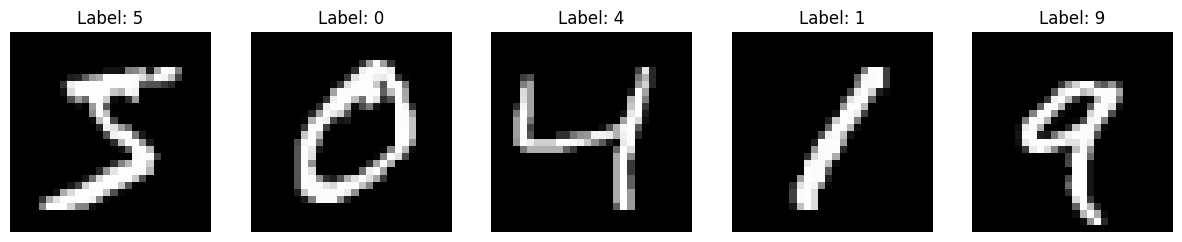

In [ ]:
X1 = np.array(X)
y1 = np.array(y)

# first 5 images
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X1[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y1[i]}")
    plt.axis('off')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn1 = KNeighborsClassifier()
clf_knn1.fit(X_train_pca, y_train)
y_pred_pca = clf_knn1.predict(X_test_pca)


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=9)  # For 10 classes, max n_components = n_classes - 1
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn2 = KNeighborsClassifier()
clf_knn2.fit(X_train_lda, y_train)
y_pred_lda = clf_knn2.predict(X_test_lda)

In [15]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"For PCA, Accuracy: {accuracy_pca:.4f}")
print(f"Classification report: \n {classification_report(y_test, y_pred_pca)}")

For PCA, Accuracy: 0.9742
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.97      0.99      0.98      1600
           2       0.97      0.98      0.98      1380
           3       0.97      0.96      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.98      0.96      0.97      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



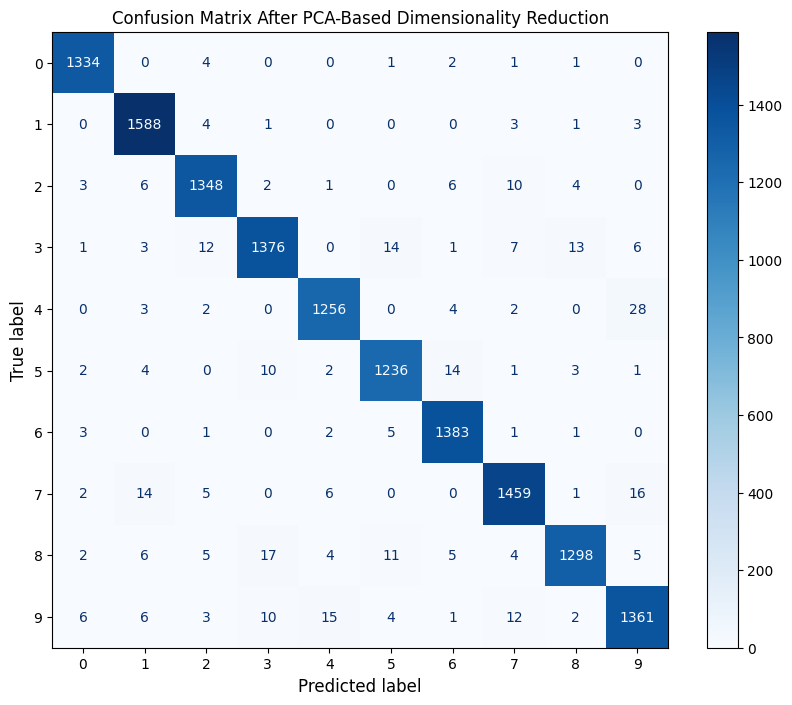

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)

plt.figure(figsize=(10, 8)) 
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.title('Confusion Matrix After PCA-Based Dimensionality Reduction', fontsize=12)
plt.show()

In [28]:
accuracy_lda = accuracy_score(y_test,y_pred_lda)
print(f"For LDA, Accuracy: {accuracy_lda:.4f}")
print(f"Classification report: \n {classification_report(y_test,y_pred_lda)}")

For LDA, Accuracy: 0.9161
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.93      0.98      0.95      1600
           2       0.90      0.91      0.91      1380
           3       0.90      0.88      0.89      1433
           4       0.90      0.93      0.91      1295
           5       0.88      0.87      0.88      1273
           6       0.95      0.95      0.95      1396
           7       0.94      0.93      0.93      1503
           8       0.90      0.84      0.87      1357
           9       0.90      0.89      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.91     14000
weighted avg       0.92      0.92      0.92     14000



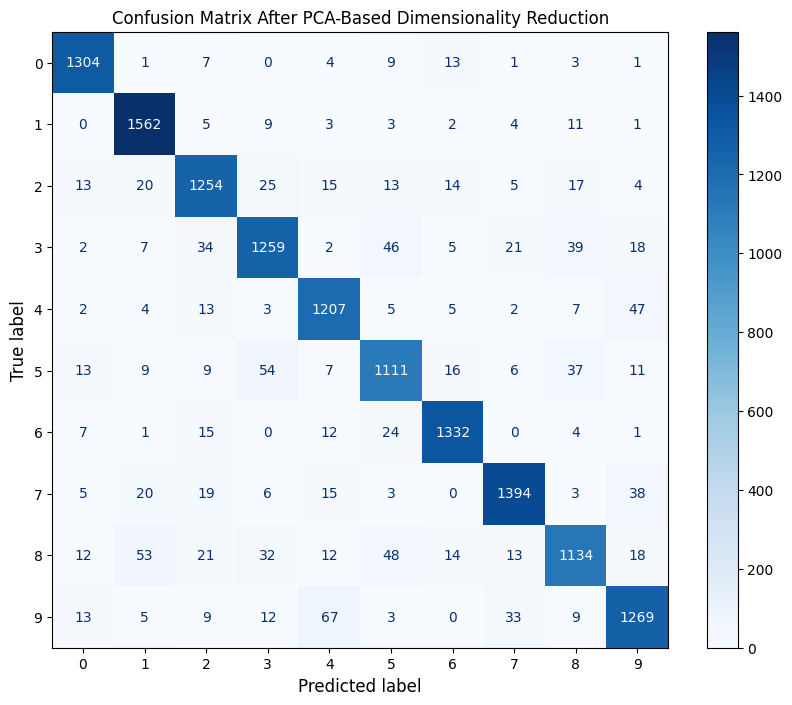

In [30]:
cm2 = confusion_matrix(y_test, y_pred_lda)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)

plt.figure(figsize=(10, 8)) 
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.title('Confusion Matrix After PCA-Based Dimensionality Reduction', fontsize=12)
plt.show()